
# Project: Hospital No-Show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report analyzes data of 100k medical appointments in brazil , in order to answer the following questions:
> - <b>Are patients that schedule their appointment further in the future more likely to not show up? </b>
> - <b>Are older patients more likely to not show up ?</b>


>The data collection processes focused on whether the patients showed up or not , thus we'll consider our response variable as the NO-Show Appoinments and the rest of our variables as the explanatory variables.
>
>
> **Note**: this project does not provide enough evidence for a causation relationship but rather inference solely based on correlation
>
>  **" correlation is not causation"**

In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import random

<a id='wrangling'></a>
## Data Wrangling









### General Properties

In [2]:
#we are gonna define a function that takes in a name of a csv file and returns df
def data(arg):
    
    df=pd.read_csv(arg)
    
    return df

In [3]:
df=data('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### variable descriptions:
>
>**ScheduledDay**: day the patient scheduled the appointment
>
>**appointmentday**: day of the actual appointment
>
>**Scholarship**: Indicates whether or not patients were enrolled in brzilian wellfare program "Bolsa Familia" (1=yes , 0 = no)
>
>**hipertension**: whether the patient had Chronic High blood pressure (1 = yes , 0 = no )
>
>**Diabetes**: whether the patient had diabetes (1 = yes , 0 = no )
>
>**Alcoholism**: whether the patient is an  alchoholic (1 = yes , 0 = no )
>
>**Handcap**: whether the patient is handicapped (1 = yes , 0 = no )
>
>**SMS_received**:number of  messages sent to the patient.
>
>**No-show**: whether the patient shown up or not 
>


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Variable descriptive statistics
> - Average age of all patients was 37 years 
>
> - 90.2% of all patients are not enrolled in the welfare program
>
> - 19% of patients have chronic high blood pressure 
>
> - 7% of patients have diabetes
>
> - 3% suffers from alchoholism
>
> - 2% of patients are handicapped
>
> - 32% of patients recieved messages 


## Data Cleaning 

### Dropping unnecessary columns 
>PatientId , AppointmentID , and Neighbourhood are irrelevant columns ,thus dropping them would allow for a smoother analysis

In [6]:
#Dropping unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)


#### Time to look for missing or Nan values
let's convert appointment date and scheduled date to datetime beforehand just in case

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  int64              
 5   Hipertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handcap         110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(2)
memory usage: 9.3+ MB


### There appears to be no missing values in this dataset 
##### let's check

In [9]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#checking for duplicated Rows
df.duplicated().sum()

722

In [11]:
#time to delete those duplicated rows
df.drop_duplicates(inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000
mean,37.105205,0.098347,0.197386,0.071882,0.030454,0.022148,0.323118
std,23.120722,0.297785,0.398028,0.258294,0.171834,0.160941,0.467670
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# notice an minimum value in Age (-1) which is a misentry , although unnessacary, deleting it provides better accuracy

df.loc[df['Age'] == -1] # located the row #99832

df.drop(labels=99832,axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis
>
>
>



### Firstly exploring each of our interest variables seperately

In [14]:
#in order to observe the correlation between these two variables
# we must create a new column with the difference between schedule day and appointment day
df['timediff'] =  abs((df['AppointmentDay']-df['ScheduledDay']).dt.total_seconds()/60/60) # Time difference in hours


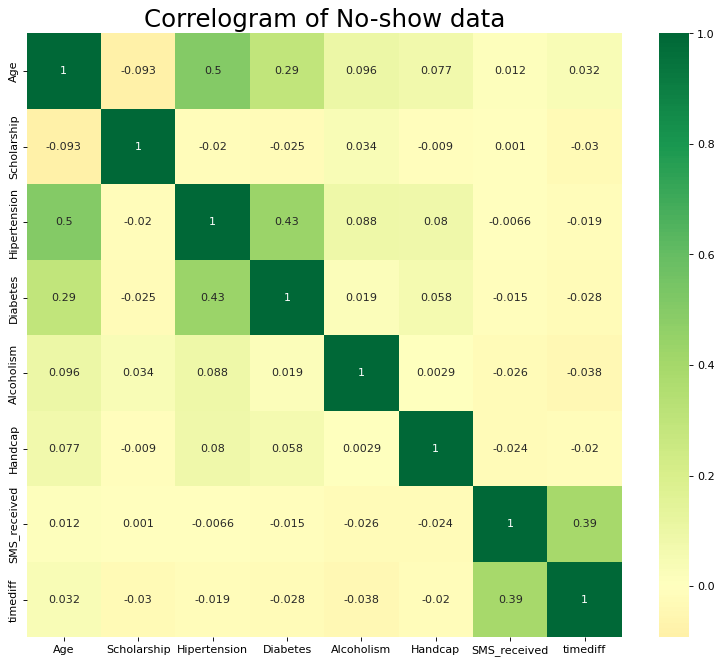

In [15]:
#A heatmap for all our variables
#
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of No-show data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


#Source :www.machinelearningplus.com


#### as shown in the heatmap above , most variables have weak correlations with each other

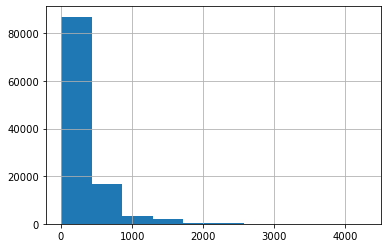

In [16]:
#firstly a histogram  of our timediff variable
df.timediff.hist();

##### as we can see in the histogram above The time difference is heavealy skewed

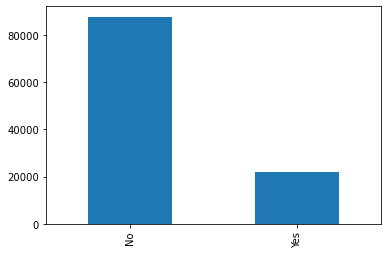

In [17]:
df['No-show'].value_counts().sort_index().plot.bar();

#### here we can see that a majority of the patients attended their appointment

### Do the time difference between the scheduled day and the appointment day correlates with show up? 

In [18]:
#splitting into those who showed up and those who didnt
show=df['No-show']== "No"
nshow=df['No-show']== "Yes"


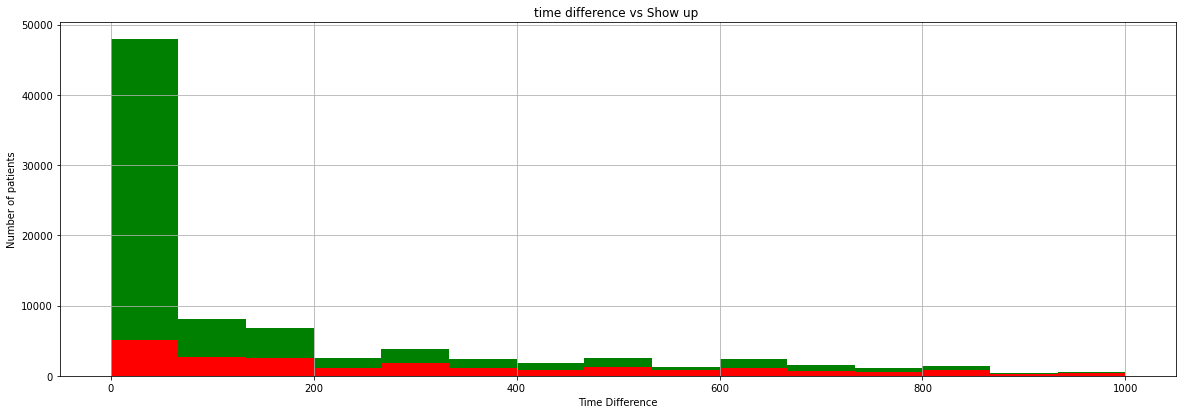

In [19]:
plt.figure(figsize=[20,6.5])
df['timediff'][show].hist(bins=15,color='green',label='showed up',range=(0,1000))
df['timediff'][nshow].hist(bins=15,color='red',label='didnt show up',range=(0,1000))
plt.title('time difference vs Show up ')
plt.xlabel('Time Difference')
plt.ylabel('Number of patients');

>it appears that the further the appointment day is from the scheduled day the more likely a patient wont show up

### Is a patient's age correlated with whether they showed up or not ?

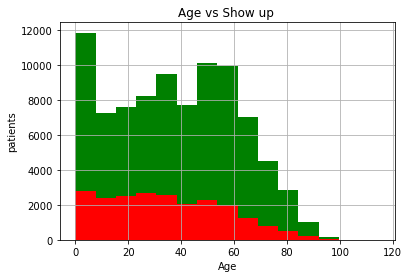

In [20]:
#plotting the histogram 
df['Age'][show].hist(bins=15,color='green',label='showed up')
df['Age'][nshow].hist(bins=15,color='red',label='didnt show up')
plt.title('Age vs Show up ')
plt.xlabel('Age')
plt.ylabel('patients');


> As shown in the histogram above age does not play a role in whether a patients showed up or not
>
> Although we can say that patients between the ages (0,10) and (50,60) are most likely to attend


### Does hypertension correlates with No-show variable?


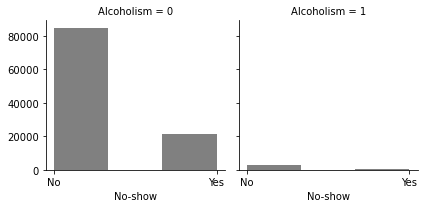

In [21]:
bar = sns.FacetGrid(df, col = 'Alcoholism')
bar.map(plt.hist, 'No-show', bins = 3,color='grey');


### it appears that Alcholism does not impact a probability of a patient attending their appointment

<a id='conclusions'></a>
## Conclusions

> This report analyzed data from the No-show data of hospitals in brazil , specifically studying the following correlations
>Age vs show and time difference vs show .
>Firstly, analyzing time difference vs show up , this report found that it appears that the further the appointment day is from the scheduled day the more likely a patient wont show up 
>Secondly,This report found found no correlation between age and show up however, we can say that patients between the ages (0,10) and (50,60) are most likely to attend.
>Finally, it appears that Alcholism does not impact a probability of a patient attending their appointment
>
>With the following data descriptions:
>
> - Average age of all patients was 37 years 
>
> - 90.2% of all patients are not enrolled in the welfare program
>
> - 19% of patients have chronic high blood pressure 
>
> - 7% of patients have diabetes
>
> - 3% suffers from alchoholism
>
> - 2% of patients are handicapped
>
> - 32% of patients recieved messages 

> **Limitations**: It is important to reiterate that this report does not provide evidence for a causation reletionship but rather correlations between these variables .
>
>This report did not conduct any regression analysis to provide a evidence based relationship between these variables
>
>As for the data itself we arent sure if its complete or without errors. Also , we can not say that dropping the duplicated rows did not have an impact in our findings .